Accuracy: 0.3333333333333333

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      0.50      0.50         2

    accuracy                           0.33         3
   macro avg       0.25      0.25      0.25         3
weighted avg       0.33      0.33      0.33         3



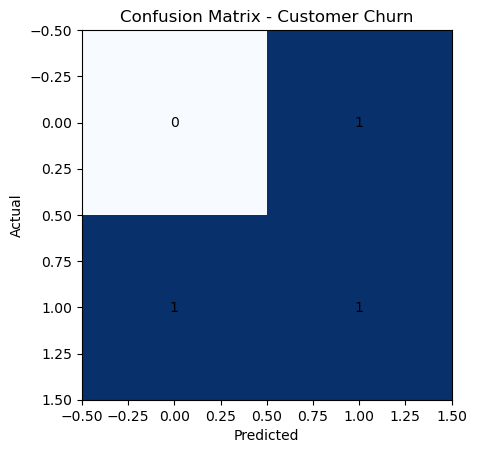

The customer is likely to STAY.


/opt/conda/envs/anaconda-panel-2023.05-py310/lib/python3.11/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt

data = pd.DataFrame({
    'gender': ['Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Male', 'Female', 'Female', 'Male'],
    'SeniorCitizen': [0, 1, 0, 0, 1, 0, 1, 1, 0, 0],
    'Partner': ['Yes', 'No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes'],
    'Dependents': ['No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'Yes', 'No'],
    'tenure': [5, 2, 8, 1, 12, 3, 20, 10, 6, 4],
    'PhoneService': ['Yes', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'Yes', 'No', 'Yes'],
    'InternetService': ['DSL', 'Fiber optic', 'DSL', 'Fiber optic', 'DSL', 'No', 'Fiber optic', 'DSL', 'No', 'DSL'],
    'MonthlyCharges': [70, 90, 60, 85, 75, 50, 100, 65, 40, 55],
    'TotalCharges': [350, 180, 480, 85, 900, 150, 2000, 650, 240, 220],
    'Churn': ['No', 'Yes', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'Yes', 'No']
})

label_encoders = {}
for col in ['gender', 'Partner', 'Dependents', 'PhoneService', 'InternetService', 'Churn']:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le

X = data.drop('Churn', axis=1)
y = data['Churn']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)

print("Accuracy:", acc)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

cm = confusion_matrix(y_test, y_pred)
plt.imshow(cm, cmap='Blues')
plt.title('Confusion Matrix - Customer Churn')
plt.xlabel('Predicted')
plt.ylabel('Actual')

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j], ha='center', va='center', color='black')

plt.show()

new_customer = np.array([[1, 0, 1, 0, 15, 1, 1, 80, 1200]])
new_customer_scaled = scaler.transform(new_customer)
prediction = model.predict(new_customer_scaled)

if prediction[0] == 1:
    print("The customer is likely to CHURN.")
else:
    print("The customer is likely to STAY.")
